In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

## 2. Data Exploration

In [2]:
df = pd.read_csv('/kaggle/input/virtual-reality-experiences/data.csv')

In [3]:
df.head()

,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel
0,1,40,Male,HTC Vive,13.598508,8,5
1,2,43,Female,HTC Vive,19.950815,2,2
2,3,27,Male,PlayStation VR,16.543387,4,2
3,4,33,Male,HTC Vive,42.574083,6,3
4,5,51,Male,PlayStation VR,22.452647,4,2


The feature description of the given dataset

**User ID:** This variable represents a unique identifier for each user participating in the VR experience. It assigns a distinct ID to each user to differentiate their data in the dataset.

**Age:** This variable captures the age of the user who participated in the VR experience. It represents the user's age at the time of the VR experience and can be an integer value.

**Gender:** This variable denotes the gender of the user. It can have categories such as 'Male', 'Female', or 'Other', representing the gender identity of the user.

**VR Headset Type:** This variable specifies the type of VR headset used by the user during the VR experience. It can include options like 'Oculus Rift', 'HTC Vive', 'PlayStation VR', or other types of VR headsets.

**Duration:** This variable represents the duration of the VR experience in minutes. It captures the length of time the user spent engaged in the virtual reality environment.

**Motion Sickness Rating:** This variable indicates the user's self-reported rating of motion sickness experienced during the VR experience. It can be on a scale of 1 to 10, with higher values indicating a higher level of motion sickness.

Dependent Variable:

**Immersion Level:** This variable measures how immersed the user felt during the VR experience. It represents the subjective level of immersion reported by the user and can be measured on a scale of 1 to 5, with 5 indicating the highest level of immersion.

## 3. Exploratory Data Analysis

In [4]:
## Checking the info in given dataset
print(f'{df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserID          1000 non-null   int64  
 1   Age             1000 non-null   int64  
 2   Gender          1000 non-null   object 
 3   VRHeadset       1000 non-null   object 
 4   Duration        1000 non-null   float64
 5   MotionSickness  1000 non-null   int64  
 6   ImmersionLevel  1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB
None


In [5]:
print(f'The total memory usage of given dataset: {df.memory_usage().sum()} bytes')

The total memory usage of given dataset: 56128 bytes


In [6]:
print(f'Null values: \n{df.isnull().sum()}')

Null values: 
UserID            0
Age               0
Gender            0
VRHeadset         0
Duration          0
MotionSickness    0
ImmersionLevel    0
dtype: int64


In [7]:
## basic statstics
print(f'The correlation of the given dataset: \n')
df.corr()

The correlation of the given dataset: 



,UserID,Age,Duration,MotionSickness,ImmersionLevel
UserID,1.000000,0.016378,-0.023869,-0.005142,0.058207
Age,0.016378,1.000000,0.025935,0.000909,-0.003225
Duration,-0.023869,0.025935,1.000000,-0.013328,0.038596
MotionSickness,-0.005142,0.000909,-0.013328,1.000000,-0.038238
ImmersionLevel,0.058207,-0.003225,0.038596,-0.038238,1.000000


<Axes: >

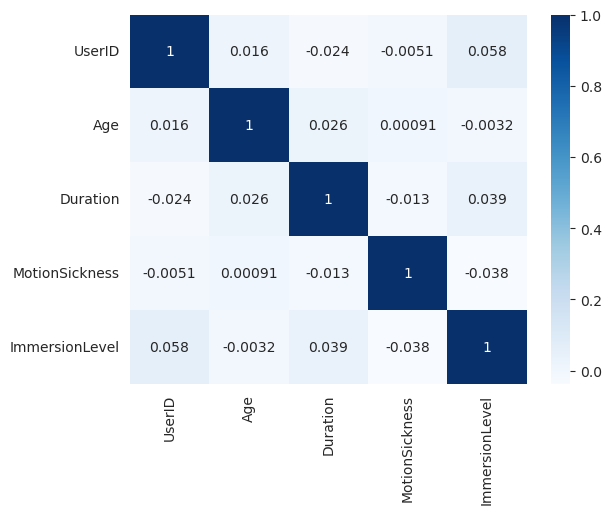

In [8]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

## 4. Data Visualization

### 4.1 Univariate Analysis

In [9]:
df.columns

Index(['UserID', 'Age', 'Gender', 'VRHeadset', 'Duration', 'MotionSickness',
       'ImmersionLevel'],
      dtype='object')

In [10]:
t = df['Gender'].value_counts()
t

Other     346
Male      329
Female    325
Name: Gender, dtype: int64

Text(0.75, 125, 'Other     346\nMale      329\nFemale    325')

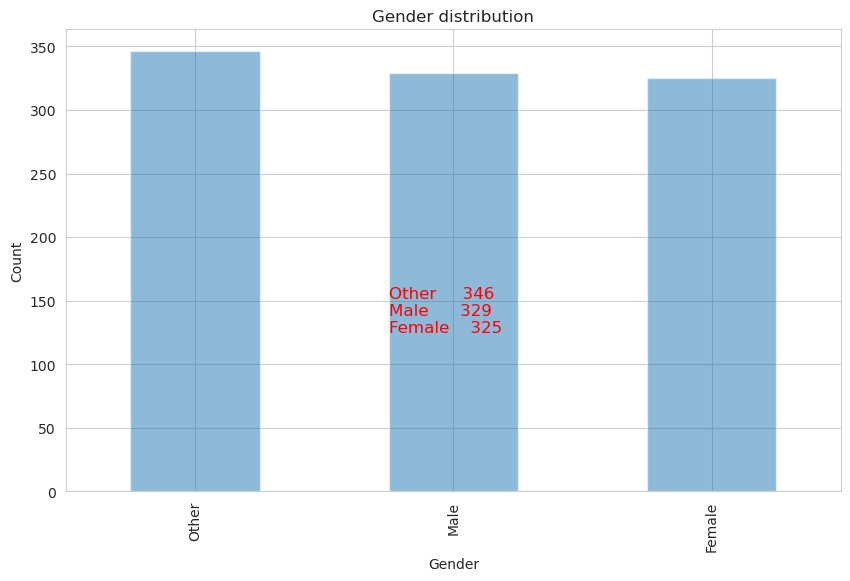

In [11]:
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='bar', alpha=0.5)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

plt.text(0.75,  125, """Other     346
Male      329
Female    325""", fontsize=12, color='red')

In [12]:
df['VRHeadset'].value_counts()

Oculus Rift       343
HTC Vive          334
PlayStation VR    323
Name: VRHeadset, dtype: int64

Text(0.7, 125, 'Oculus Rift       343\nHTC Vive          334\nPlayStation VR    323')

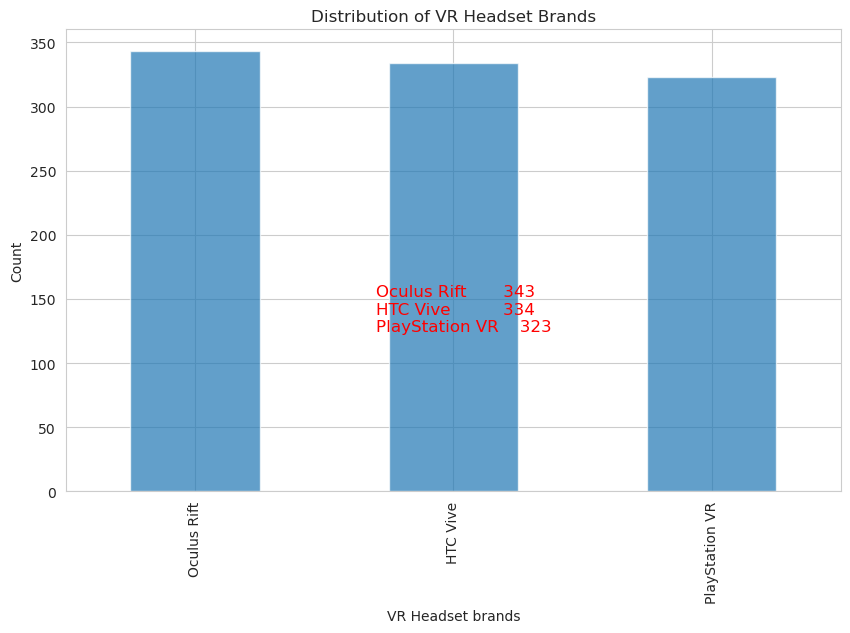

In [13]:
plt.figure(figsize=(10, 6))
df['VRHeadset'].value_counts().plot(kind='bar', alpha=0.7)

plt.xlabel('VR Headset brands')
plt.ylabel('Count')
plt.title('Distribution of VR Headset Brands')

plt.text(0.70, 125, """Oculus Rift       343
HTC Vive          334
PlayStation VR    323""", fontsize=12, color='red')

Text(0.5, 0, 'duration in minutes')

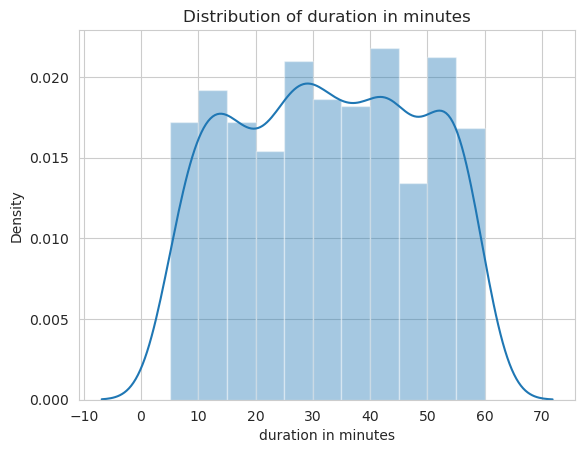

In [14]:
sns.distplot( x= df['Duration'])
plt.title('Distribution of duration in minutes')
plt.xlabel('duration in minutes')

Text(0, 0.5, 'Sound in DB')

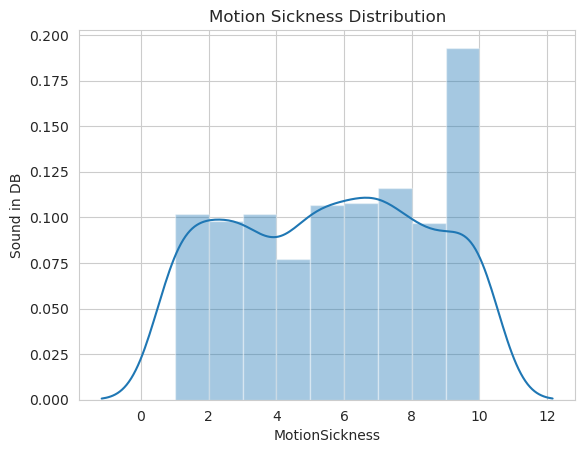

In [15]:
sns.distplot(df['MotionSickness'])
plt.title('Motion Sickness Distribution')
plt.ylabel('Sound in DB')

### 4.2 Bivariate Analysis

In [16]:
## Age vs features

fig = px.box(x=df['Age'], y=df['Duration'])

fig.update_layout(title='Age vs Usage Duration', xaxis_title='Age', yaxis_title='Duration in Minutes')

fig.show()

In [17]:
## Age vs features

fig = px.box(x=df['Age'], y=df['Duration'], color=df['Gender'])

fig.update_layout(title='Age vs Usage Duration', xaxis_title='Age', yaxis_title='Duration in Minutes')

fig.show()

In [18]:
## Duration vs VR Brand

fig = px.box(x=df['VRHeadset'], y=df['Duration'], color=df['Gender'])

fig.update_layout(title='VR Headeset vs Usage Duration', xaxis_title='Age', yaxis_title='VR Headeset')

fig.show()

In [19]:
#sns.lmplot(data=df, x='Age', y='MotionSickness')

In [20]:
fig = px.scatter(x=df['Age'], size=df['MotionSickness'], y=df['Duration'])

fig.update_layout(title='Age vs Motion Sickness distribution', 
                  xaxis_title='Age', 
                  yaxis_title='Duration in Minutes')

fig.show()

In [21]:
fig = px.scatter(x = df['MotionSickness'], y=df['Duration'],color=df['VRHeadset'])

fig.update_layout(title='Motion Sickness vs VR Headset Brands',
                 xaxis_title='MotionSickness',
                 yaxis_title = 'Duration in Minutes')

fig.show()

## 5. Model Building

### 5.1 Data Preparation for Model Building

In [22]:
df_1 = df.copy()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserID          1000 non-null   int64  
 1   Age             1000 non-null   int64  
 2   Gender          1000 non-null   object 
 3   VRHeadset       1000 non-null   object 
 4   Duration        1000 non-null   float64
 5   MotionSickness  1000 non-null   int64  
 6   ImmersionLevel  1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, StratifiedGroupKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import loguniform

In [24]:
le = LabelEncoder()

#le.fit(df['Gender'])

df_1['Gender'] = le.fit_transform(df_1['Gender'])
print("""Label Encoder for Gender category

Female - 0
Male - 1
Other- 2 """)

df_1['VRHeadset'] = le.fit_transform(df['VRHeadset'])
print("""Label encoder for VR Headset Category

HTC Vive - 0
Oculus Rift - 1
PlayStation VR - 2""")

df_1['ImmersionLevel'] = le.fit_transform(df_1['ImmersionLevel'])
df_1['ImmersionLevel'].value_counts()

Label Encoder for Gender category

Female - 0
Male - 1
Other- 2 
Label encoder for VR Headset Category

HTC Vive - 0
Oculus Rift - 1
PlayStation VR - 2


1    208
3    206
0    202
2    193
4    191
Name: ImmersionLevel, dtype: int64

In [25]:
x = df_1.drop('ImmersionLevel', axis=1)
y = df_1['ImmersionLevel']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (800, 6)
y_train shape: (800,)
X_test shape: (200, 6)
y_test shape: (200,)


### 5.2 Model Building

In [28]:
def model_evaluation(y_pred, y_test=y_test):
    
    #Mean Absolute Error
    print('*'*70)
    print(f'Mean Absolute Error: {mean_absolute_error(y_pred, y_test)}')
    print('*'*70)
    
    #accuracy score of the given Metrics
    print(f'Accuracy Score: {accuracy_score(y_pred, y_test)}')
    print('*'*70)
    
    #Confusion Matrix
    print(f"Confusion Matrix: \n{confusion_matrix(y_pred, y_test)}")
    print('*'*70)
    
    #classification report 
    print(f"Classification Report: \n{classification_report(y_pred, y_test)}")
    

In [29]:
dtc = DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=5)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=5, min_samples_leaf=4,
                       min_samples_split=5)

In [30]:
dtc_pred = dtc.predict(X_test)

In [31]:
model_evaluation(dtc_pred)

**********************************************************************
Mean Absolute Error: 1.55
**********************************************************************
Accuracy Score: 0.195
**********************************************************************
Confusion Matrix: 
[[ 7  6  6  6  3]
 [12  9 12  8  9]
 [12  8  8 12 10]
 [11  8  6  5  6]
 [ 7 10  3  6 10]]
**********************************************************************
Classification Report: 
              precision    recall  f1-score   support

           0       0.14      0.25      0.18        28
           1       0.22      0.18      0.20        50
           2       0.23      0.16      0.19        50
           3       0.14      0.14      0.14        36
           4       0.26      0.28      0.27        36

    accuracy                           0.20       200
   macro avg       0.20      0.20      0.20       200
weighted avg       0.20      0.20      0.20       200



In [32]:
xgb = XGBClassifier(learning_rate=0.002, n_estimators=500, nthread=3)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

model_evaluation(xgb_pred)

**********************************************************************
Mean Absolute Error: 1.49
**********************************************************************
Accuracy Score: 0.225
**********************************************************************
Confusion Matrix: 
[[ 9  6  4  1  5]
 [12  7  7  6  8]
 [ 8  7 11  9  7]
 [11  9 10 13 13]
 [ 9 12  3  8  5]]
**********************************************************************
Classification Report: 
              precision    recall  f1-score   support

           0       0.18      0.36      0.24        25
           1       0.17      0.17      0.17        40
           2       0.31      0.26      0.29        42
           3       0.35      0.23      0.28        56
           4       0.13      0.14      0.13        37

    accuracy                           0.23       200
   macro avg       0.23      0.23      0.22       200
weighted avg       0.25      0.23      0.23       200



## Summary EDA

### Age :

- Most users are 30- 40 years old 
- Immersionlevel are almost balanced in each age group 
- Most users are aged 30- 40

### Gender :

- Each gender has almost the same amount
- Majority of males have 4 Immersion Levels
-  Females are balanced
-  1 & 2 are the highest for others

### VRHeadset :

- Most of users use Oculus Rift
- Oculus Rift gives the best experience

### Duration :

- Users with durations below 20 minutes have a low immersion level.
- Longer duration gives higher immersionlevel

### MotionSickness :

- Higher Motion Sickness gives lower immersion rates